In [4]:
# code:3-5
import matplotlib.pyplot as plt

# 定义树结点格式常量
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNdoe = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plot_node(nodeTxt, centerPt, parentPt, nodeType):
    """
    实际的绘图
    """
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', xytext=centerPt, 
                            textcoords='axes fraction', va="center", ha="center", bbox=nodeType, 
                            arrowprops=arrow_args) # annotate: 标注文字

def createPlot():
    # 创建新的图形，并清空绘图区
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    
    # 绘制两个不同类型的树结点
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plot_node(U'desion node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plot_node(U'child node', (0.8, 0.1), (0.3, 0.8), leafNdoe)
    plt.show()


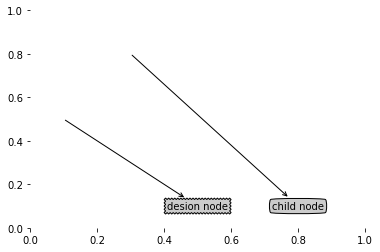

In [5]:
createPlot()

In [6]:
# code 3-6
def get_num_leafs(myTree):
    """
    获取叶节点数目
    """
    num_leafs = 0
    first_str = list(myTree.keys())[0]
    second_dict = myTree[first_str]
    for key in second_dict.keys():
        # 测试结点数据类型是否为字典
        if type(second_dict[key]).__name__=='dict':
            num_leafs += get_num_leafs(second_dict[key])
        else:
            num_leafs += 1
    return num_leafs

def get_tree_depth(myTree):
    """
    获取树的深度
    """
    max_depth = 0
    first_str = list(myTree.keys())[0]
    second_dict = myTree[first_str]
    for key in second_dict.keys():
        if type(second_dict[key]).__name__=='dict':
            this_depth = 1 + get_tree_depth(second_dict[key])
        else:
            this_depth = 1
        if this_depth > max_depth: max_depth = this_depth
    return max_depth

def retrieve_tree(i):
    list_of_trees = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                     {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}]
    return list_of_trees[i]

In [7]:
retrieve_tree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [8]:
myTree = retrieve_tree(0)
print(get_num_leafs(myTree))
print(get_tree_depth(myTree))

3
2


In [28]:
# code3-7 plotTree
def plot_mid_text(cntrPt, parentPt, txt_string):
    """
    父子节点之间填充文本信息
    @cntrPt: 子节点位置(x, y)信息（tuple）
    @parentPt: 父节点位置(x, y)信息（tuple）
    """
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txt_string)

def plot_tree(myTree, parentPt, nodeTxt):
    """
    绘图
    """
    # 计算宽高
    num_leafs = get_num_leafs(myTree)
    depth = get_tree_depth(myTree)
    first_str = list(myTree.keys())[0]
    
    # 标记子结点属性值
    cntrPt = (plot_tree.xOff + (1.0 + float(num_leafs))/2.0/plot_tree.totalW, plot_tree.yOff)
    plot_mid_text(cntrPt, parentPt, nodeTxt)
    # 画节点
    plot_node(first_str, cntrPt, parentPt, decisionNode)
    # 减少y的偏移量，即更新深度
    second_dict = myTree[first_str]
    plot_tree.yOff = plot_tree.yOff - 1.0/plot_tree.totalD
    # 递归绘图
    for key in second_dict.keys():
        if type(second_dict[key]).__name__=='dict':
            plot_tree(second_dict[key], cntrPt, str(key))
        else:
            plot_tree.xOff = plot_tree.xOff + 1.0/plot_tree.totalW
            plot_node(second_dict[key], (plot_tree.xOff, plot_tree.yOff), cntrPt, leafNdoe)
            plot_mid_text((plot_tree.xOff, plot_tree.yOff), cntrPt, str(key))
    # 回退y值
    plot_tree.yOff = plot_tree.yOff + 1.0/plot_tree.totalD
        
def create_plot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    
    # plot_tree: 函数的全局变量
    # 宽度： 叶子节点数
    # 深度： 深度
    plot_tree.totalW = float(get_num_leafs(inTree))
    plot_tree.totalD = float(get_tree_depth(inTree))
    # xOff、yOff用来追踪已绘制的节点位置
    plot_tree.xOff = -0.5/plot_tree.totalW
    plot_tree.yOff = 1.0
    plot_tree(inTree, (0.5, 1.0), '')
    plt.show()

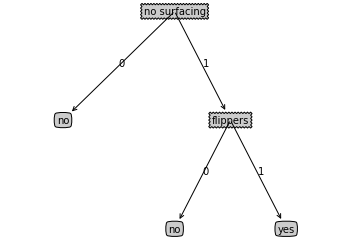

In [29]:
myTree = retrieve_tree(0)
create_plot(myTree)